In [1]:
import classes.QSys as qsys
import classes.QSim as qsim
import QuantumToolbox as qtbox
import QuantumToolbox.operators as oper
import QuantumToolbox.functions as qFncs
import QuantumToolbox.operators as qOps
import QuantumToolbox.liouvillian as lio
import QuantumToolbox.states as states
import Plotting.SimplePlots as sPlt

import scipy.sparse as sp
import numpy as np

from functools import partial
from multiprocessing import Pool, cpu_count

In [2]:
resonatorDimension = 200
g = 1.79
qfreq = 0
resFreq = 2
irreg = False

In [3]:
def digitalRabi(obj, stepSize):
    HamJC = 2 * np.pi * (((obj.subSystems['0'].frequency/2)*obj.subSystems['0'].freeMat) + obj.couplingHam)
    UnitaryJC = lio.Liouvillian(HamJC, timeStep=(stepSize / 2))
    UnitaryAJC = (UnitaryJC @ UnitaryJC)
    Unitary = UnitaryJC @ obj.sigmaX @ UnitaryAJC @ obj.sigmaX @ UnitaryJC
    return Unitary

In [4]:
JCSys = qsys.QuantumSystem()
cav = qsys.Cavity(dimension=resonatorDimension, frequency=resFreq)
JCSys.addSubSys(cav)

qub = JCSys.createSubSys(subClass=qsys.Qubit)
qub.frequency = qfreq

In [5]:
JCcoupling = JCSys.coupleBy(qub, cav,'JC', g)

JCSys.initialState = sp.kron(states.basis(cav.dimension, 0), states.basis(2, 1), format='csc')

simulating


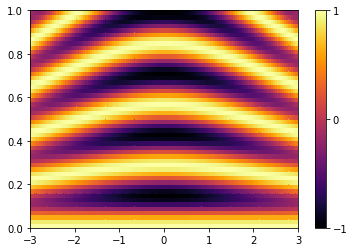

s
{}


In [6]:
qSim = qsim.Simulation(JCSys)
qSim.sweepKey = 'frequency'

cavParity = qOps.parityEXP(cav.freeMat)
p = Pool(processes=cpu_count())
print('simulating')
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)

sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit,irreg)
print(JCSys._QuantumSystem__kept)

In [7]:
JCSys.reset()
JCSys.addSysCoupling([qub,cav],[qtbox.operators.sigmax, qtbox.operators.create], g)
JCSys.addSysCoupling([cav, qub],[qtbox.operators.destroy, qtbox.operators.sigmax], g)
JCSys.couplingName = 'Rabi'

print(JCSys.couplingName)

Rabi


simulating


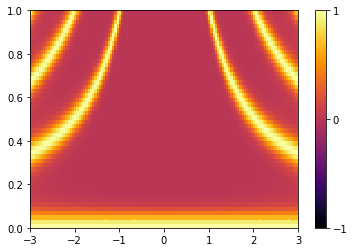

s
{'JC': [{0: <classes.QSys.sysCoupling object at 0xa21dff600>}, None]}


In [8]:
qSim.qSys = JCSys
print('simulating')
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit,irreg)
print(JCSys._QuantumSystem__kept)

In [9]:
JCSys.reset(to='JC')
#JCSys.addCoupling([qub,cav],[qtbox.operators.destroy, qtbox.operators.create], g)
#JCSys.addCoupling([cav, qub],[qtbox.operators.destroy, qtbox.operators.create], g)
JCSys.sigmaX = sp.kron(oper.identity(cav.dimension), oper.sigmax())
JCSys.Unitaries = digitalRabi

simulating
calculating


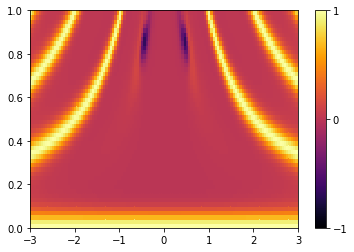

s
{'JC': [{0: <classes.QSys.sysCoupling object at 0xa21dff600>}, None], 'Rabi': [{0: <classes.QSys.sysCoupling object at 0x1111f7670>, 1: <classes.QSys.sysCoupling object at 0x1111f7590>}, None]}


In [10]:
qSim.qSys = JCSys
print('simulating')
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
print('calculating')
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit,irreg)
print(JCSys._QuantumSystem__kept)

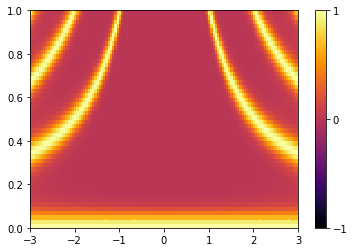

s
{'JC': [{0: <classes.QSys.sysCoupling object at 0xa21dff600>}, None], 'Rabi': [{0: <classes.QSys.sysCoupling object at 0x1111f7670>, 1: <classes.QSys.sysCoupling object at 0x1111f7590>}, None], 2: [{0: <classes.QSys.sysCoupling object at 0xa21dff600>}, <function digitalRabi at 0xa21fb57a0>]}


In [11]:
JCSys.reset(to='Rabi')

qSim.qSys = JCSys

statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit,irreg)
print(JCSys._QuantumSystem__kept)

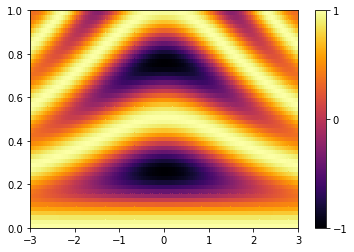

s
{'JC': [{0: <classes.QSys.sysCoupling object at 0xa21dff600>}, None], 'Rabi': [{0: <classes.QSys.sysCoupling object at 0x1111f7670>, 1: <classes.QSys.sysCoupling object at 0x1111f7590>}, None], 2: [{0: <classes.QSys.sysCoupling object at 0xa21dff600>}, <function digitalRabi at 0xa21fb57a0>]}


In [13]:
JCSys.reset(to='JC')
JCcoupling.couplingStrength = 1
qSim.qSys = JCSys
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit,irreg)
print(JCSys._QuantumSystem__kept)

2


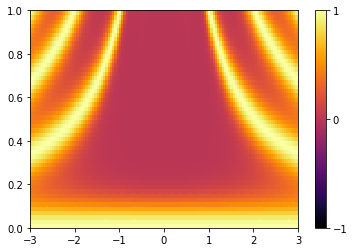

s
{'JC': [{0: <classes.QSys.sysCoupling object at 0xa21dff600>}, None], 'Rabi': [{0: <classes.QSys.sysCoupling object at 0x1111f7670>, 1: <classes.QSys.sysCoupling object at 0x1111f7590>}, None], 2: [{0: <classes.QSys.sysCoupling object at 0xa21dff600>}, <function digitalRabi at 0xa21fb57a0>]}


In [14]:
JCSys.reset(to=2)
print(JCSys.couplingName)
qSim.qSys = JCSys
statesDigit = p.map(partial(qSim.evolveTimeIndep, cav), qSim.sweepList)
parityDigit = p.map(partial(qFncs.expectationList, cavParity),statesDigit)
sPlt.colorPlot(qSim.sweepList, qSim.times, parityDigit,irreg)
print(JCSys._QuantumSystem__kept)